<div style="background-color: #e0f7fa; padding: 20px; border-radius: 8px; overflow: auto">
        <img src="img/uoc.png" width="120" height="180" style="float: right; margin-left: 20px;"/>

  <h1>Treball final de Màster</h1>
    <p> Autor: Pau Bernabe </p>
</div>



<div>
    <p>Aquest treball de final de màster té com objectiu trobar la millor manera de detectar els fraus que es cometen
    fent servir targeta de crèdit. Per això, primer s'analitzen les dades per veure les particularitats d'aquestes, on s'evidencia un clar desbalancejament de classes. Es fan servir diversos mètodes i tècniques de data science per tal d'obtenir un model que permeti detectar el frau amb el major èxit possible.</p>
    <p>El conjunt de dades fet servir es el de Credit Card Fraud Detection, obtingut de la plataforma Kaggle.</p>
</div>

<img src="img/dataset-cover.jpg"/>

# Taula de continguts

- [1. Anàlisi de les dades](#analisi-dades)
- [2. Partició de les dades](#split-data)

- [3. Mètodes: Cerca del millor](#methods)
  - [3.1 Regressió Logística](#lg-3)
  - [3.2 Random Forest](#rf-3)
  - [3.3 SVM](#svm-3)
  - [3.4 LGBM](#lgbm-3)
  - [3.5 XGBoost](#xgboost-3)
  - [3.6 Xarxa Neuronal](#nn-3)

- [4. Maneig de les dades desequilibrades](#imbalanced-4)
  - [4.1 Undersampling](#undersampling-4)
  - [4.2 SMOTE](#smote-4)



<a id="analisi-dades"></a>
## 1. Anàlisi de les dades


In [1]:
'''
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/Master/TFM')
'''

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from utils import *

random_seed = 42

In [5]:
#filename = '/content/drive/MyDrive/Master/TFM/creditcard.csv.zip'

In [8]:
filename = './creditcard.csv.zip'

In [9]:
df = pd.read_csv(filename)

# Display DataFrame
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Tal com s'indica a la descripció del conjunt de dades, aquest dataset ha estat preprocessat mitjançant PCA per tal d'anonimitzar les dades sensibles.

In [10]:
df.shape

(284807, 31)

### Anàlisi del conjunt de dades

In [11]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [12]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Revisant els valors de totes les columnes, es troba que totes les columnes comprenen valors continus, excepte la classe.

### Valors absents

No es troben valors absents en cap de les columnes

In [13]:
columns_with_nan = df.columns[df.isna().any()].tolist()
print(columns_with_nan)

[]


### Distribució de les Classes

In [14]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

<Axes: ylabel='count'>

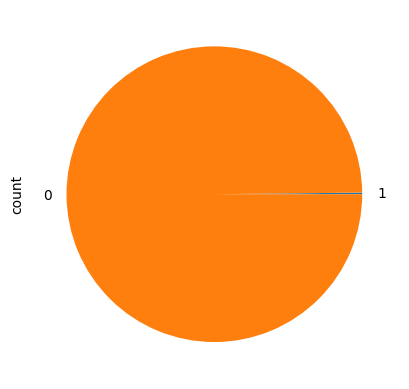

In [15]:
df['Class'].value_counts().sort_values().plot(kind = 'pie')

Es pot veure un desbalancejament clar. On la classe 0 és la clara majoria i la classe 1 només representa el 0.172% de les transaccions.

### Característiques de la variable Amount

La columna Amount representa la quantitat de diners que s'ha mogut en la transacció. És la característica que ens permet tenir informació tangible sobre el conjunt de dades.
Cal revisar la seva distribució per veure si segueix algun patró.

In [16]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

#### Característiques de la variable Amount, únicament quan la classe és frau

Quan la transacció és frau es pot veure que l'import sotstret en el 50% dels casos és menor de 10 euros. No obstant això, també es troben casos per sobre de 100 euros.

In [17]:
df[df['Class'] == 1]['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

#### Característiques de la variable Amount, únicament quan la classe NO és frau

In [18]:
df[df['Class'] == 0]['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

#### Correlació de les variables

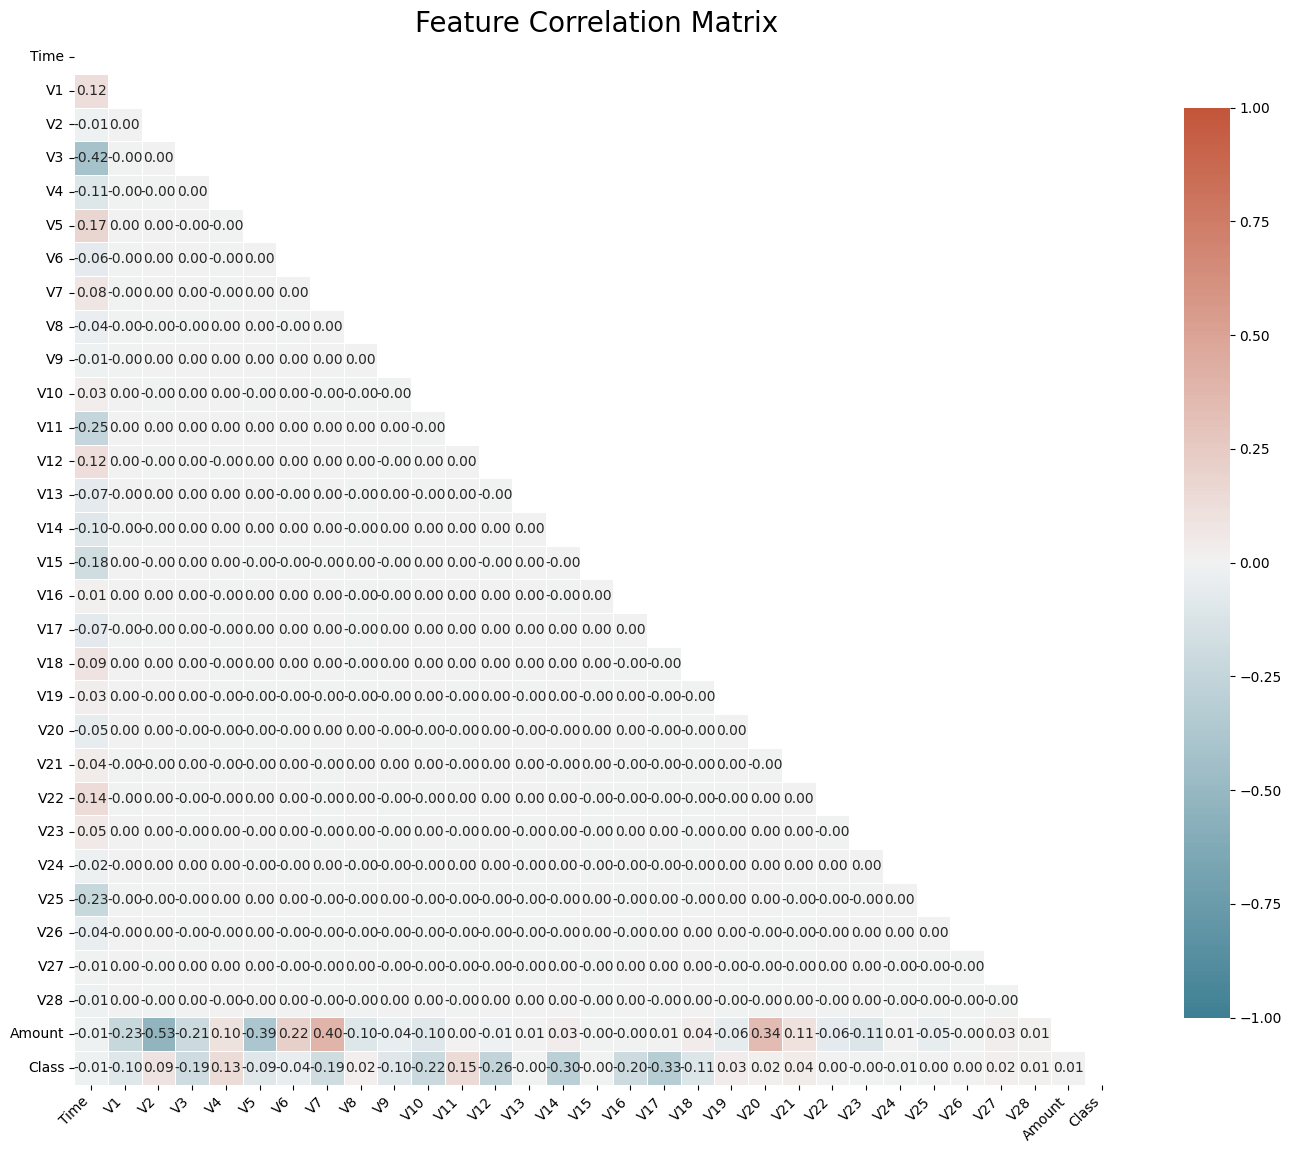

In [21]:
import seaborn as sns

# Assuming you have a dataframe called 'df'
corr = df.corr()

# Set up the figure
plt.figure(figsize=(14, 12))

# Create a mask for the upper triangle (optional, looks cleaner)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create a custom color palette
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(
    corr,
    mask=mask,                # upper triangle hidden
    cmap=cmap,                 # beautiful diverging colors
    vmax=1.0,
    vmin=-1.0,
    center=0,
    square=True,
    linewidths=0.5,
    annot=True,                # shows the correlation values
    fmt=".2f",                 # 2 decimal places
    cbar_kws={"shrink": 0.8}
)

plt.title('Feature Correlation Matrix', fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Estandaritzar variables

En aquest cas únicament s'estandaritzen variable Time i Amount.

In [22]:
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()

df['scaled_amount'] = std_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = std_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

df.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


<a id="split-data"></a>
## 2.Split the data

En aquest punt, abans de desenvolupar els models, cal dividir la data en conjunt d'entrenament i de prova (test).

In [23]:
X = df.drop('Class', axis=1)
y = df['Class']

In [24]:
print(X.shape, y.shape)

(284807, 30) (284807,)


Es fa servir el paràmetre stratify per tal de distribuir uniformement les classes als conjunts

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=random_seed,
    stratify=y
)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(227845, 30) (56962, 30) (227845,) (56962,)


## 3.Mètodes


En aquest apartat es fan servir diferents mètodes d'aprenentatge automàtic amb el conjunt de dades original, sense manegar el problema del desbalanceig. En cadascún dels mètodes es volen trobar els millors hiperparàmetres per tal d'assegurar el millor rendiment de cada model.

In [26]:
# Imports

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
import tensorflow as tf

from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.metrics import AUC
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import adjusted_rand_score


all_results = []

/Users/pau/Desktop/TFM/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [27]:
experiment_name = "Model Fine-Tuning"

### 3.1  Regressió Logística

El primer model que es prova és la Regressió Logística per veure com funciona un model lineal amb el conjunt de dades que s'està tractant. Per trobar els millors hiperparàmetres es farà ús de GridSearchCV.

In [28]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'class_weight': [None, 'balanced'],
    'max_iter': [200]
}

logistic_regression1 = grid_search_best_model(LogisticRegression(), param_grid, X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'C': 0.1, 'class_weight': None, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score: 0.9992143781957032


Best Parameters: {'C': 0.1, 'class_weight': None, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}
Best ROC-AUC Score: 0.9992143781957032

In [29]:
y_probs = logistic_regression1.predict_proba(X_test)[:, 1]

Un cop aconseguits els millors paràmetres per aquest model, es fa la predicció sobre el conjunt de test. La predicció es retorna amb probabilitats, ja que, es vol ajustar el llindar (o threshold) per tal d'obtenir el millor balanç entre recall i precisió. Per defecte aquest llindar sempre és 0.5.

Es fa servir la curva Precisió-Recall per analitzar quin és el millor valor de llindar. A més de comparar-ho amb les mètriques de més endavant (Precisió, Recall, F1...)

El que s'aconsegueix disminuint el valor del threshold és ser més flexible en determinar que un registre és un frau (classe 1). Això permet obtenir més fraus, però a la vegada pot donar problemes de precisió. Per això cal escollir un valor idoni.

In [68]:
threshold = 0.15
y_pred = (y_probs >= threshold).astype(int)

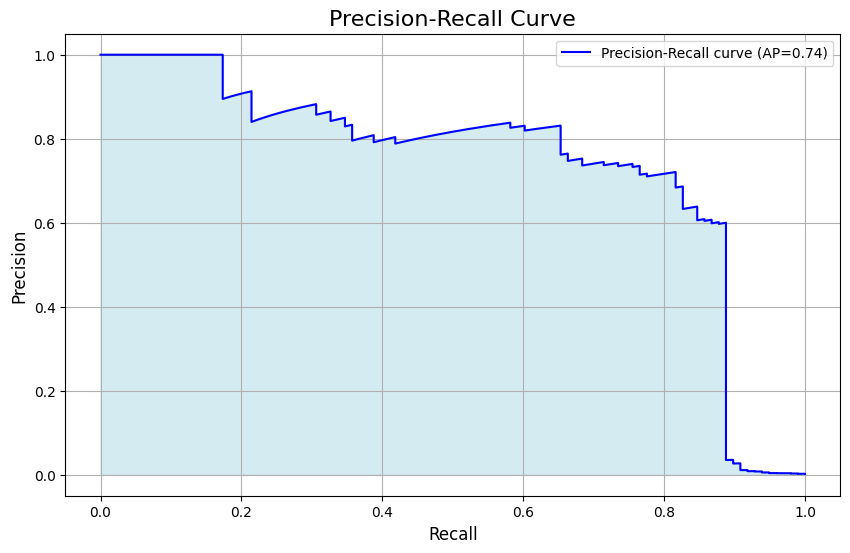

In [69]:
plot_precision_recall(y_test, y_probs)

Logistic regression  has an AUC score of  0.8773136118544209


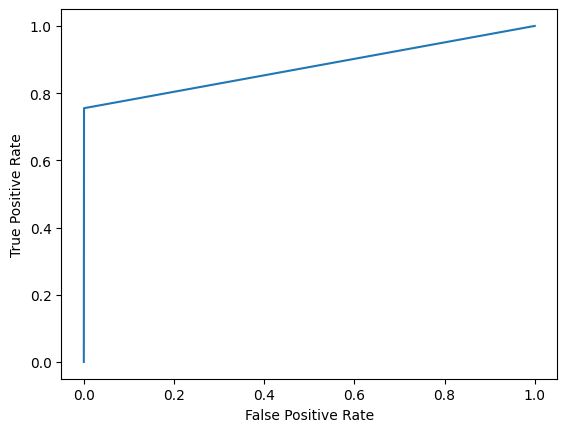

In [62]:
plot_roc_curve(y_test, y_pred, "Logistic regression")

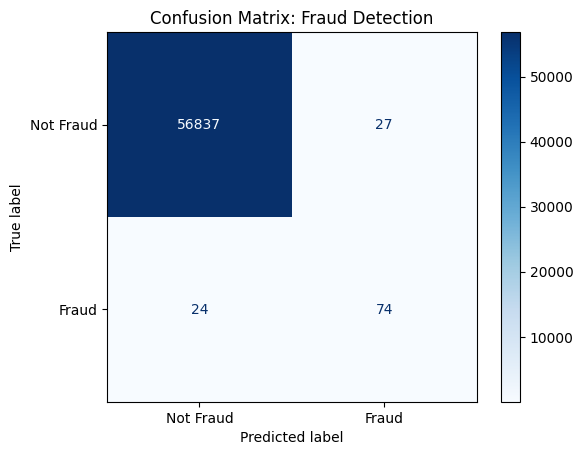

In [63]:
plot_confusion_matrix(y_test, y_pred)

Si es dona una ullada a la matriu de confusió, es detecten erròniament 27 casos com a frau (FP) i 24 (FN). Es detecten 74 casos com a correctes positius.

In [64]:
classification_metrics(y_test, y_pred, "Logistic Regression", experiment_name, all_results)

,Model,Data Type,Class,Precision,Recall,F1-Score,Macro F1,Weighted F1
0,Logistic Regression,Model Fine-Tuning,0,1.000,1.000,1.000,0.872,0.999
1,Logistic Regression,Model Fine-Tuning,1,0.733,0.755,0.744,0.872,0.999


Les mètriques de classificació són diverses i es separen per classe perquè la classe majoritària infla positivament molt les mètriques i el que interessa és detectar els fraus, classe minoritària. Sobretot cal centrar-se en tenir un bon balanç entre precisió i recall. Una baixa precisió i un recall elevat faria detectar tots els casos de frau, no obstant això, faria tenir molts falsos positius que tampoc és el cas ideal. Una alta precisió i un baix recall faria que molts casos de frau no es detectessin.

En aquest model, el threshold a 0.15 ens dona una precisió de 0.733 i un recall de 0.755 que es pot considerar una bona base per partir i seguir millorant amb altres mètodes.

### 3.2  Random Forest

In [ ]:
rf_tuning_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'class_weight': ['balanced']
}

#clf = grid_search_best_model(RandomForestClassifier(random_state=random_seed), rf_tuning_params, X_train, y_train)

#Best parameters hardcoded for faster execution
clf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=random_seed)

clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

En aquest cas el threshold s'estableix a 0.3. Es pot veure que la corba Precision-Recall és prou bona. El paràmetre class_weight ajuda a donar més pes a la classe minonitària.

In [ ]:
y_probs = clf.predict_proba(X_test)[:, 1]

threshold = 0.3
y_pred = (y_probs >= threshold).astype(int)

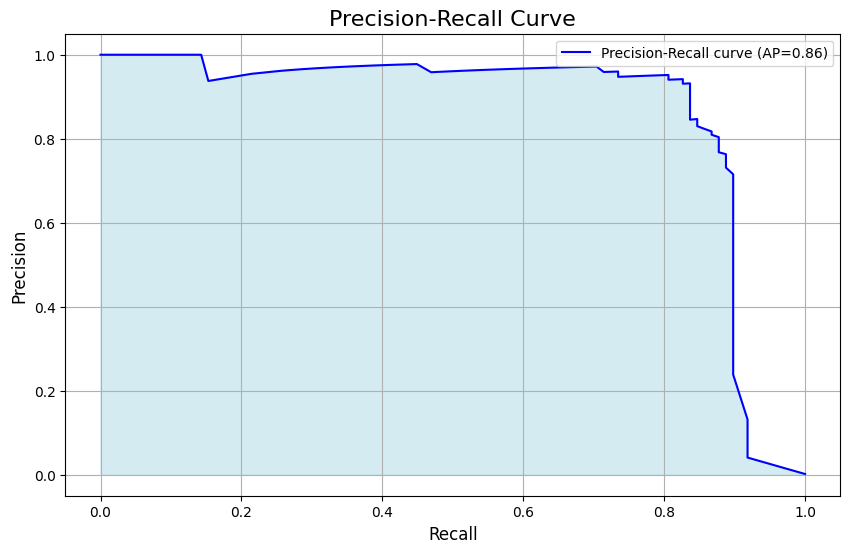

In [ ]:
plot_precision_recall(y_test, y_probs)

Random forest  has an AUC score of  0.9132213415754596


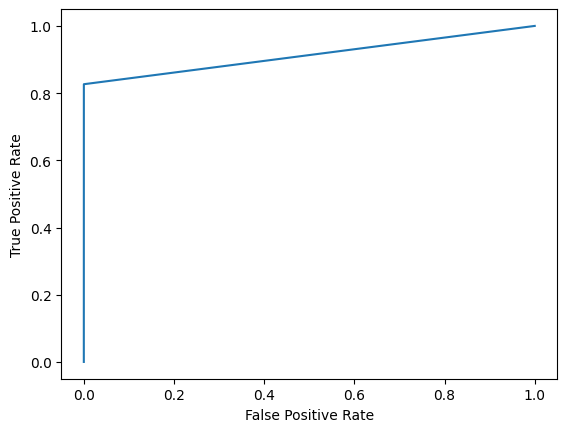

In [ ]:
plot_roc_curve(y_test, y_pred, "Random forest")

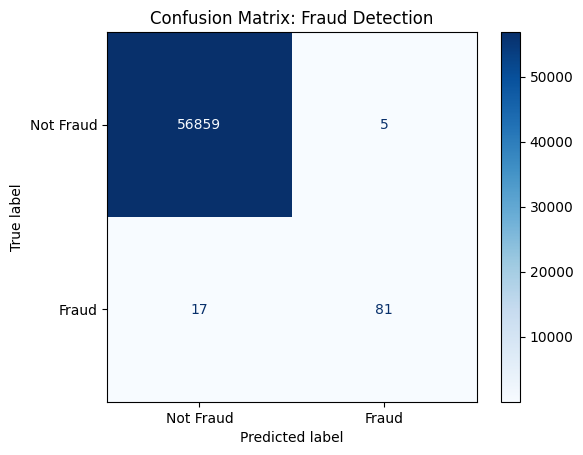

In [ ]:
plot_confusion_matrix(y_test, y_pred)

A la matriu de confusió d'aquest model es poden veure uns resultats força millors que al model anterior, on només tenim 5 falsos positius i 17 falsos negatius. Es detecten 81 fraus correctament.

In [ ]:
classification_metrics(y_test, y_pred,  "Random Forest", experiment_name, all_results)

,Model,Data Type,Class,Precision,Recall,F1-Score,Macro F1,Weighted F1
0,Random Forest,Model Fine-Tuning,0,1.000,1.000,1.00,0.94,1.0
1,Random Forest,Model Fine-Tuning,1,0.942,0.827,0.88,0.94,1.0


Donant un cop d'ull a les mètriques, la millora és notable. S'obté una alta precisió i un recall més elevat que al model anterior. Si parlem de la F1-Score també es prou elevat, tenint en compte la particularitat de les dades.

### 3.3 LGBM

In [70]:
param_grid = {
    'num_leaves': [100, 200, 300],
    'learning_rate': [0.001, 0.01, 0.1]
}

model = grid_search_best_model(lgb.LGBMClassifier(random_state=random_seed, verbose=-1), param_grid, X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[LightGBM] [Info] Number of positive: 394, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006364 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001729 -> initscore=-6.358339
[LightGBM] [Info] Start training from score -6.358339
Best Parameters: {'learning_rate': 0.01, 'num_leaves': 100}
Best Score: 0.9993636024490333


In [86]:
y_probs = model.predict_proba(X_test)[:, 1]

threshold = 0.2
y_pred = (y_probs >= threshold).astype(int)

En aquest cas el threshold s'ha definit a 0.2, amb una corba P-R amb una AP lleugerament inferior al Random Forest

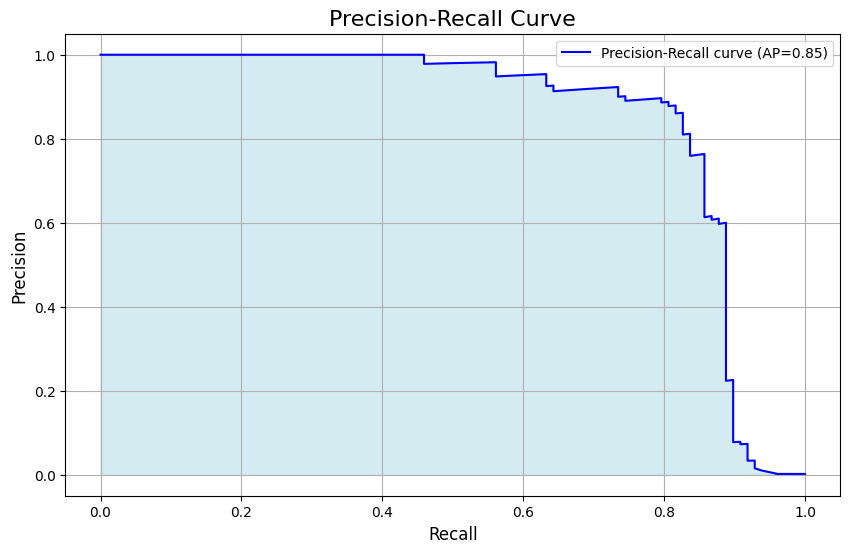

In [87]:
plot_precision_recall(y_test, y_probs)

LightGBM  has an AUC score of  0.8774718842235825


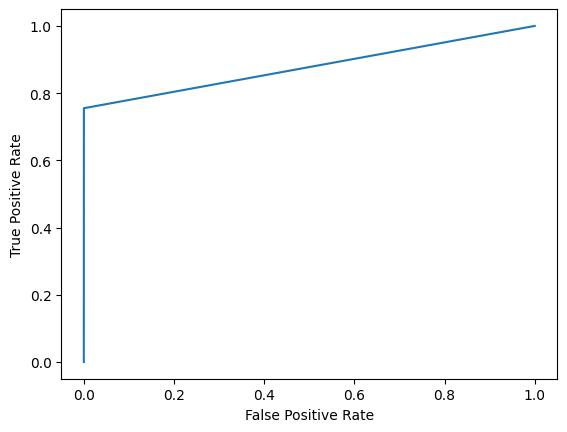

In [88]:
plot_roc_curve(y_test, y_pred, "LightGBM")

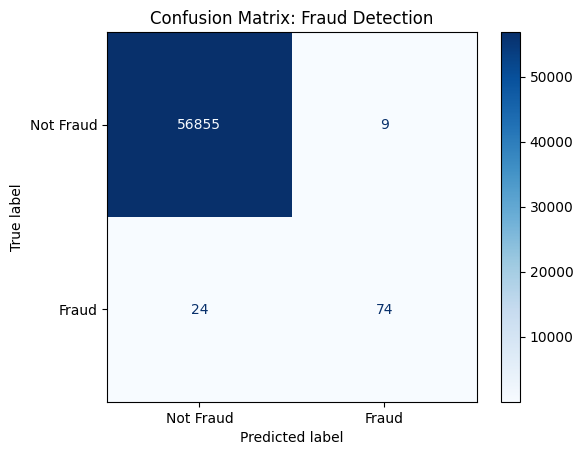

In [89]:
plot_confusion_matrix(y_test, y_pred)

Es pot observar que el nombre de FP i FN ha augmentat en comparació al Random Forest, el millor model fins ara.

In [90]:
classification_metrics(y_test, y_pred, "LGBM", experiment_name, all_results)

,Model,Data Type,Class,Precision,Recall,F1-Score,Macro F1,Weighted F1
0,LGBM,Model Fine-Tuning,0,1.000,1.000,1.000,0.909,0.999
1,LGBM,Model Fine-Tuning,1,0.892,0.755,0.818,0.909,0.999


[LightGBM] [Info] Number of positive: 316, number of negative: 181960
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030396 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 182276, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001734 -> initscore=-6.355800
[LightGBM] [Info] Start training from score -6.355800
[LightGBM] [Info] Number of positive: 315, number of negative: 181961
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016112 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 182276, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001728 -> initscore=-6.358975
[LightGBM] [Info] Start training from score -6.358975
[LightGBM] [

### 3.4 XGBoost

In [91]:

model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=random_seed
)


param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10],
    'eta': [0.001, 0.01, 0.05]
}

model = grid_search_best_model(model, param_grid, X_train, y_train)



Fitting 5 folds for each of 24 candidates, totalling 120 fits


/Users/pau/Desktop/TFM/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'eta': 0.05, 'max_depth': 5, 'n_estimators': 200}
Best Score: 0.9995654940858918


In [117]:
y_probs = model.predict_proba(X_test)[:, 1]

threshold = 0.4
y_pred = (y_probs >= threshold).astype(int)

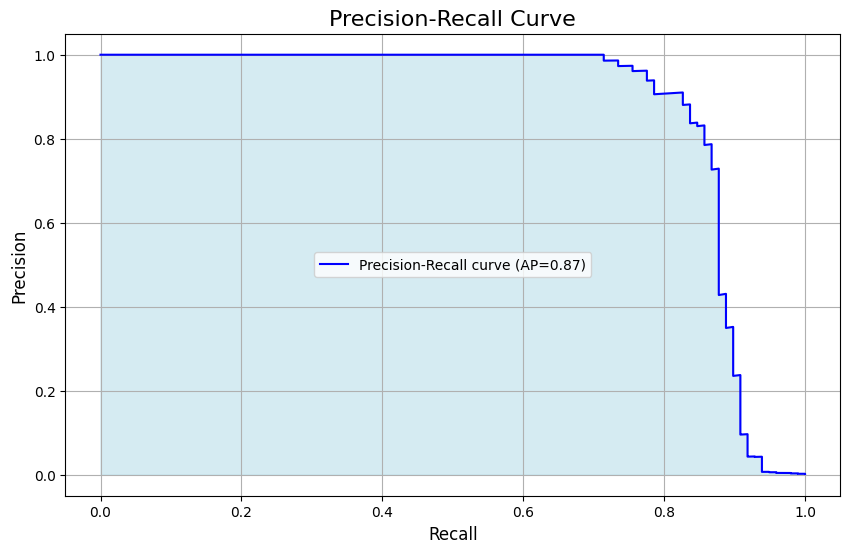

In [118]:

plot_precision_recall(y_test, y_probs)

XGBoost  has an AUC score of  0.9131773770284703


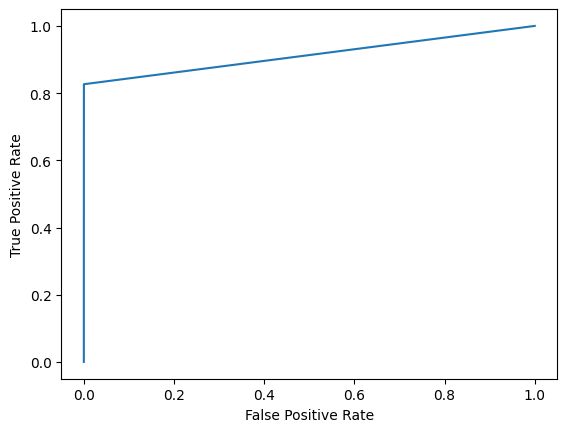

In [123]:
plot_roc_curve(y_test, y_pred, "XGBoost")

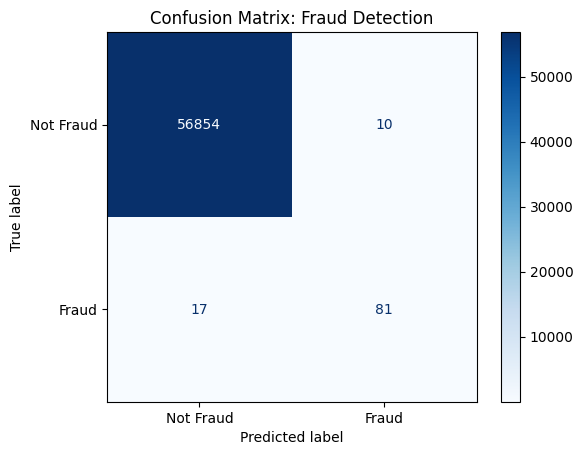

In [124]:
plot_confusion_matrix(y_test, y_pred)

En aquest model que fa servir XGBoost té un rendiment força bo. Detectant correctament 81 casos, per contra detecta incorrectament 10 FP i 17 FN.

In [121]:
classification_metrics(y_test, y_pred, "XGBoost", experiment_name, all_results)

,Model,Data Type,Class,Precision,Recall,F1-Score,Macro F1,Weighted F1
0,XGBoost,Model Fine-Tuning,0,1.00,1.000,1.000,0.928,1.0
1,XGBoost,Model Fine-Tuning,1,0.89,0.827,0.857,0.928,1.0


En quant la precisió i recall hi ha força equilibri i els valors són molt semblants als del Random Forest previ. Per tant, es pot determinar que és un bon model.

### 3.5 Neural Network

In [ ]:
model = Sequential([
    InputLayer(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy', AUC(name='auc'), tf.keras.metrics.Recall(name='recall')])

Es defineix un callback que permet que l'entrenament acabi abans si el model no millora el recall.

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_recall',
    mode='max',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

In [ ]:
history = model.fit(X_train, y_train,
                    callbacks=[early_stopping],
                    epochs=30, batch_size=16, validation_split=0.2)

Epoch 1/30
11393/11393 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.9986 - auc: 0.8490 - loss: 0.0123 - recall: 0.6410 - val_accuracy: 0.9994 - val_auc: 0.9392 - val_loss: 0.0034 - val_recall: 0.7952
Epoch 2/30
11393/11393 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.9993 - auc: 0.9426 - loss: 0.0031 - recall: 0.7635 - val_accuracy: 0.9994 - val_auc: 0.9333 - val_loss: 0.0036 - val_recall: 0.8072
Epoch 3/30
11393/11393 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - accuracy: 0.9995 - auc: 0.9459 - loss: 0.0029 - recall: 0.8059 - val_accuracy: 0.9994 - val_auc: 0.9395 - val_loss: 0.0030 - val_recall: 0.7711
Epoch 4/30
11393/11393 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.9995 - auc: 0.9574 - loss: 0.0025 - recall: 0.8075 - val_accuracy: 0.9994 - val_auc: 0.9796 - val_loss: 0.0033 - val_recall: 0.7590
Epoch 5/30
11393/11393 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - accuracy: 0.9995 - auc: 0.9557 - loss: 0.0026 - recall: 0.7836 - val_accuracy: 0.9994 - val_auc: 0.9509 - val_loss: 0.0028 - val_

In [ ]:
y_pred = model.predict(X_test).flatten()

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


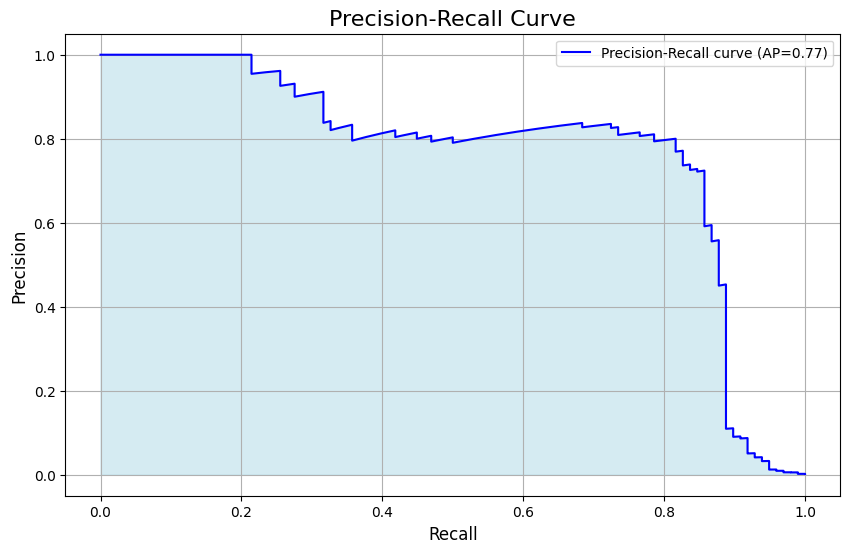

In [ ]:
plot_precision_recall(y_test, y_pred)

In [ ]:
y_pred = (y_pred > 0.5).astype(int)

Neural Network  has an AUC score of  0.9028853663018387


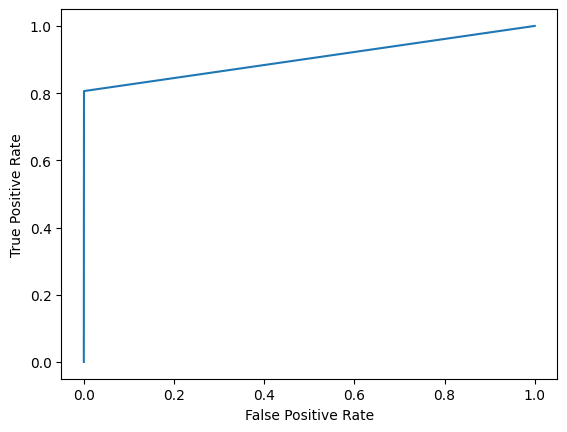

In [ ]:
plot_roc_curve(y_test, y_pred, "Neural Network")

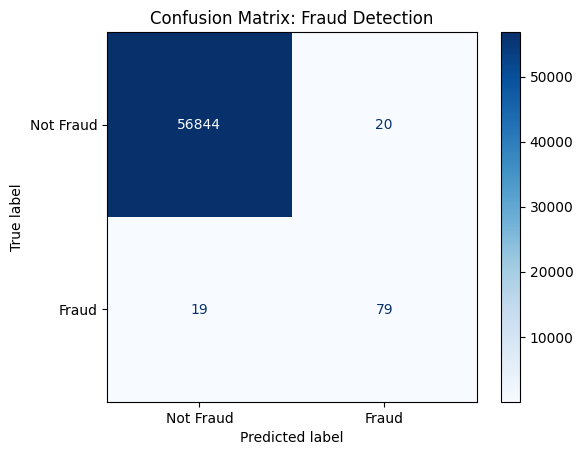

In [ ]:
plot_confusion_matrix(y_test, y_pred)

In [ ]:
classification_metrics(y_test, y_pred, "Neural Network", experiment_name, all_results)

,Model,Data Type,Class,Precision,Recall,F1-Score,Macro F1,Weighted F1
0,Neural Network,Model Fine-Tuning,0,1.000,1.000,1.000,0.901,0.999
1,Neural Network,Model Fine-Tuning,1,0.798,0.806,0.802,0.901,0.999


El rendiment de la xarxa neuronal no brilla pel seu rendiment. Els models anteriors han funcionat millor. Precisió baixa i un recall millorable.

Recapitulació dels resultats d'aquest apartat. Els millors models son el Random Forest i XGBoost.

In [ ]:
final_results_df_3 = pd.concat(all_results, ignore_index=True)
final_results_df_3

,Model,Data Type,Class,Precision,Recall,F1-Score,Macro F1,Weighted F1
0,Neural Network,Model Fine-Tuning,0,1.000,1.000,1.000,0.901,0.999
1,Neural Network,Model Fine-Tuning,1,0.798,0.806,0.802,0.901,0.999


## 4. Maneig de les dades desequilibrades

En aquest apartat s'utilitzen diferents mètodes per tal de poder predir de manera més precisa el frau. Es faran dos estudis: primer es farà servir una tècnica anomenada Random Undersampling i en el segon estudi una tècnica anomenada SMOTE.

En aquest plot es torna a aplicar un PCA al conjunt de dades per tal de veure la distribució de les transaccions. Les de color vermell indiquen que son frau i les de color blau les que son transaccions legítimes. És un gràfic interessant per veure la distribució dels registres. En aquesta vista, son les dades d'entrenament originals.

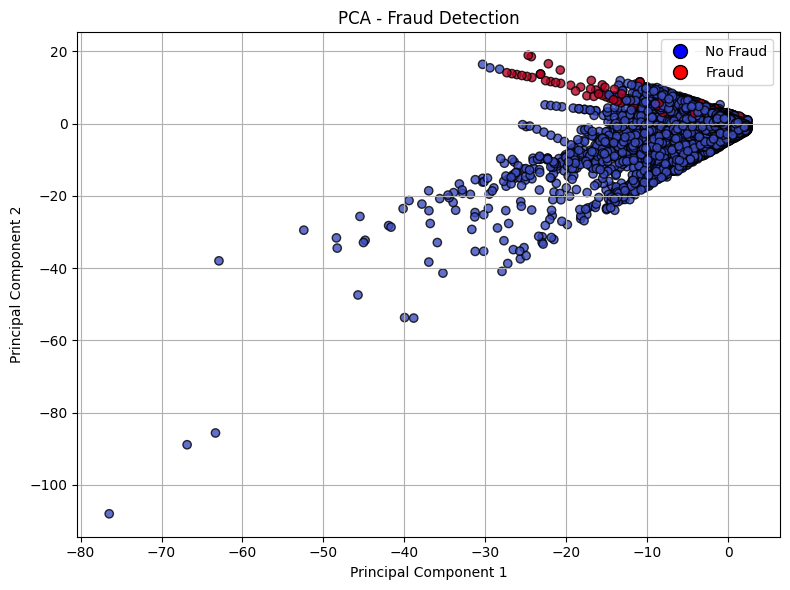

In [ ]:
plot_class_distribution(X_train, y_train)

### 4.1 Undersampling

Undersampling vol dir reduir les mostres del conjunt de dades. És una tècnica molt utilitzada en problemes d'aquest estil on tenim classes molt desbalancejades. Farem servir el RandomUnderSampler.

In [125]:
experiment_name = "Undersampling"

In [126]:
from imblearn.under_sampling import RandomUnderSampler

Per defecte, la tècnica de reduir mostres iguala el nombre de la classe majoritària a la classe minoritària. Això faria que el conjunt de dades fos molt pobre. Per tant, es decideix que la classe 0 tingui 1000 mostres.

In [127]:
sampling_strategy = {0: 1000}

undersampler = RandomUnderSampler(random_state=random_seed, sampling_strategy=sampling_strategy)

X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)

/Users/pau/Desktop/TFM/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/Users/pau/Desktop/TFM/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [128]:
print(X_train_undersampled.shape, y_train_undersampled.shape)

(1394, 30) (1394,)


Es pot veure la distribució un cop feta la reducció de mostres.

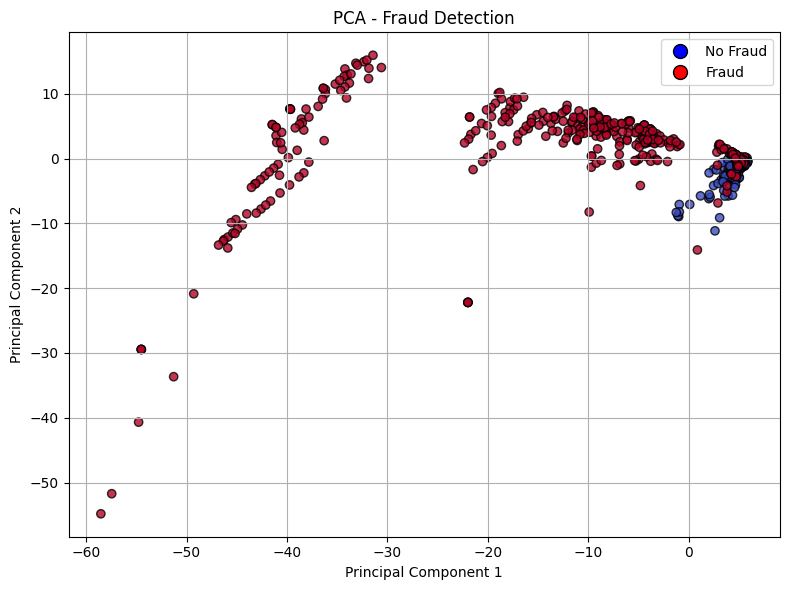

In [129]:
plot_class_distribution(X_train_undersampled, y_train_undersampled)

#### Logistic Regression

In [130]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'class_weight': [None, 'balanced'],
    'max_iter': [200]
}

model = grid_search_best_model(LogisticRegression(), param_grid, X_train_undersampled, y_train_undersampled)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'C': 1, 'class_weight': None, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score: 0.9641370774348264


In [136]:
y_probs = model.predict_proba(X_test)[:, 1]
threshold = 0.9
y_pred_undersampled = (y_probs > threshold).astype(int)

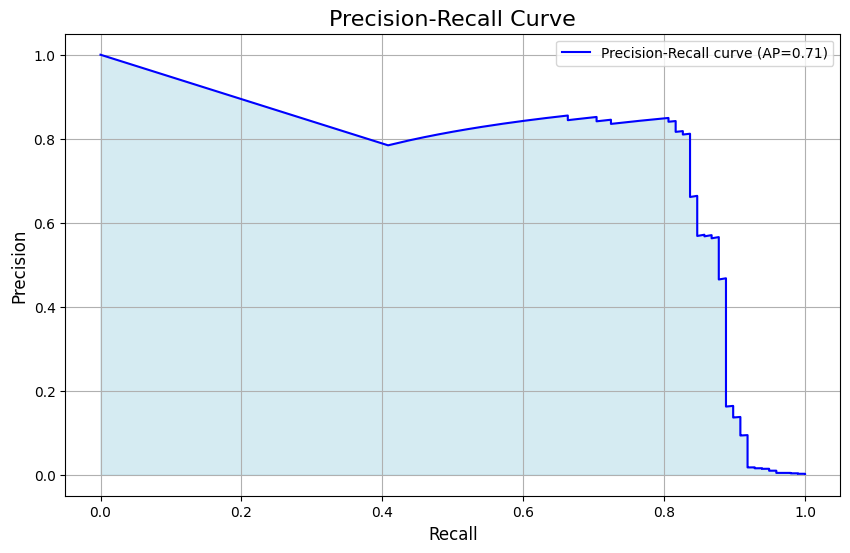

In [137]:
plot_precision_recall(y_test, y_probs)

model  has an AUC score of  0.9408967547345332


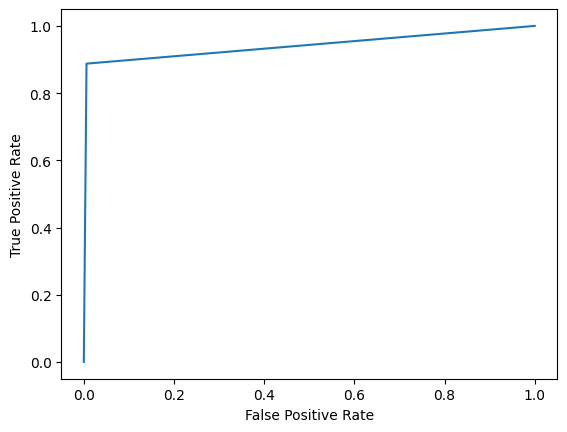

In [138]:
plot_roc_curve(y_test, y_pred_undersampled)

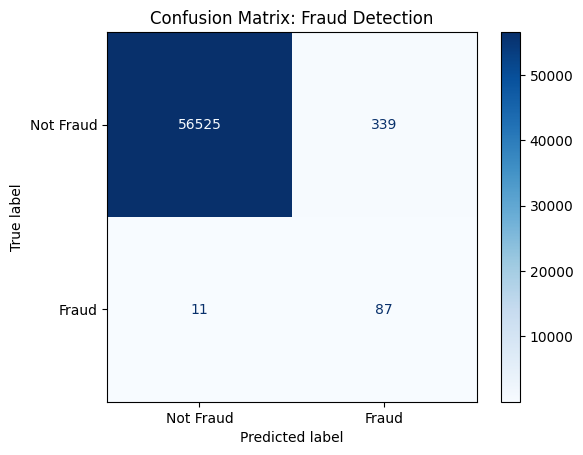

In [139]:
plot_confusion_matrix(y_test, y_pred_undersampled)

In [140]:
classification_metrics(y_test, y_pred_undersampled, "Logistic Regression", experiment_name, all_results)

,Model,Data Type,Class,Precision,Recall,F1-Score,Macro F1,Weighted F1
0,Logistic Regression,Undersampling,0,1.000,0.994,0.997,0.664,0.996
1,Logistic Regression,Undersampling,1,0.204,0.888,0.332,0.664,0.996


Es pot veure que els resultats no son positius amb aquesta tècnica, tenint una precisió molt baixa i un recall alt però amb un nombre elevat de FP.

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier


rf_tuning_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None]
}

clf = grid_search_best_model(RandomForestClassifier(random_state=random_seed), rf_tuning_params, X_train_undersampled, y_train_undersampled)

#clf.fit(X_train_undersampled, y_train_undersampled)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'max_depth': 20, 'n_estimators': 100}
Best ROC-AUC Score: 0.962703385678554


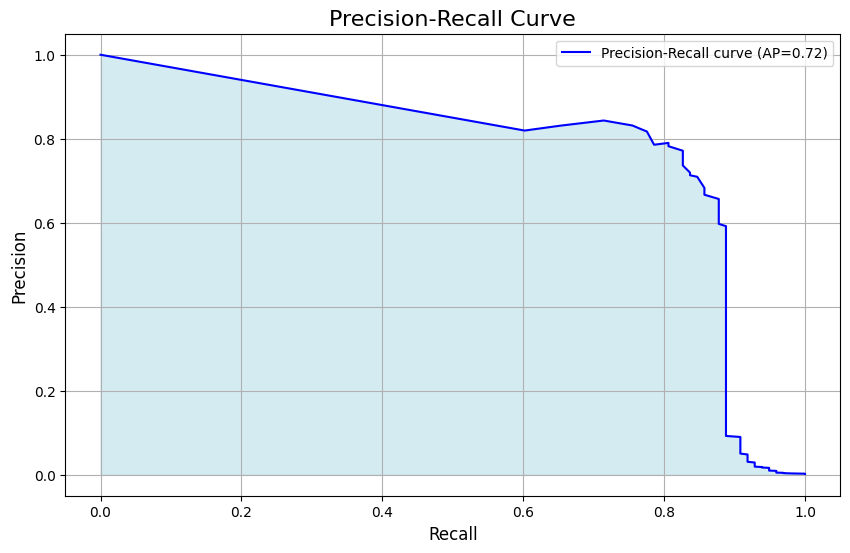

In [ ]:
y_probs = clf.predict_proba(X_test)[:, 1]

threshold = 0.9
y_pred = (y_probs >= threshold).astype(int)


plot_precision_recall(y_test, y_probs)

random forest  has an AUC score of  0.9130278975687067


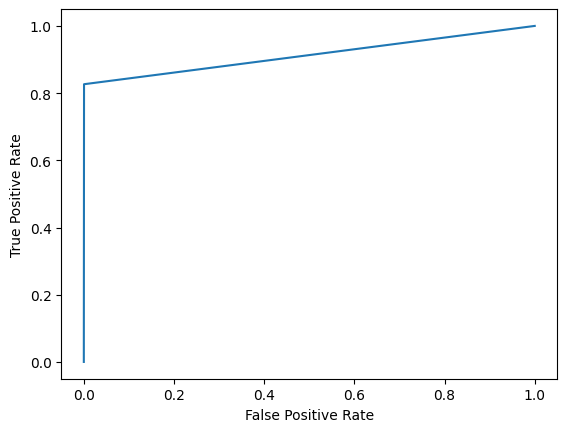

In [ ]:
plot_roc_curve(y_test, y_pred, "random forest")

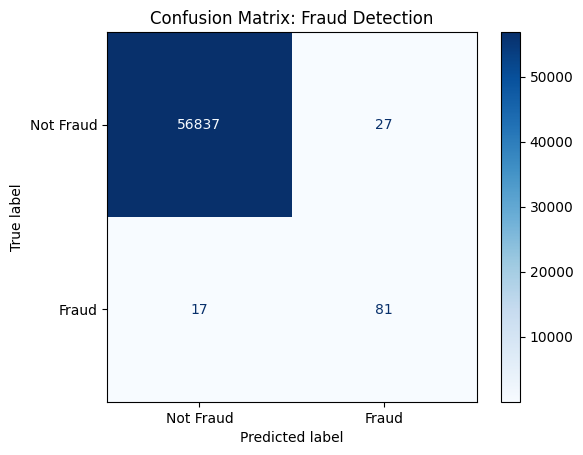

In [ ]:
plot_confusion_matrix(y_test, y_pred)

Respecte l'apartat anterior (3), en aquest cas tenim més FP i més FN.

In [ ]:
classification_metrics(y_test, y_pred, "Random Forest", experiment_name, all_results)

,Model,Data Type,Class,Precision,Recall,F1-Score,Macro F1,Weighted F1
0,Random Forest,Undersampling,0,1.00,1.000,1.000,0.893,0.999
1,Random Forest,Undersampling,1,0.75,0.827,0.786,0.893,0.999


Els resultats són raonables però al model de l'apartat anterior eren molt millors. Per ser justos, cal dir que el mètode de Random Forest manega bé situacions adverses amb les dades.

#### LGBM

In [29]:

param_grid = {
    'num_leaves': [50, 100, 200, 300],
    'learning_rate': [0.001, 0.01, 0.1, 0.5]
}

model = grid_search_best_model(lgb.LGBMClassifier(random_state=random_seed, verbose=-1),
                               param_grid, X_train_undersampled, y_train_undersampled)



Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'learning_rate': 0.5, 'num_leaves': 50}
Best ROC-AUC Score: 0.9655681906088033


In [50]:
y_probs = model.predict_proba(X_test)[:, 1]

threshold = 0.99
y_pred = (y_probs >= threshold).astype(int)

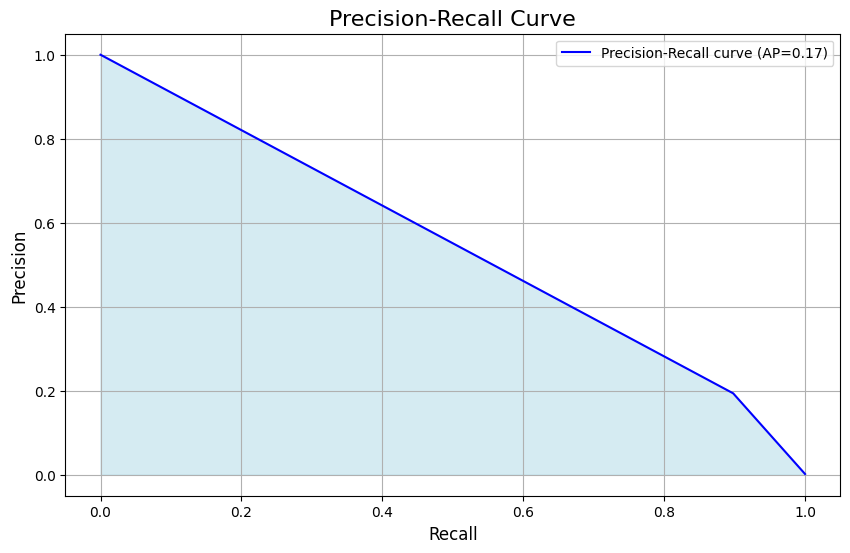

In [51]:
plot_precision_recall(y_test, y_pred)

LightGBM  has an AUC score of  0.9457613869971174


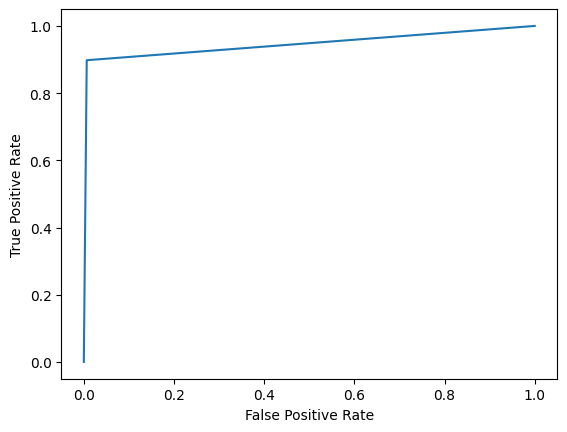

In [52]:
plot_roc_curve(y_test, y_pred, "LightGBM")

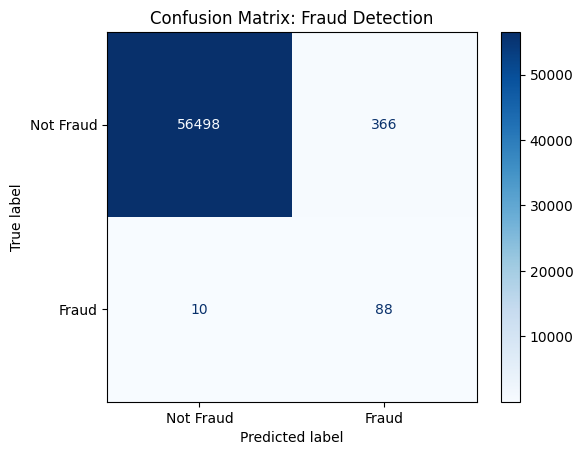

In [53]:
plot_confusion_matrix(y_test, y_pred)

Molts falsos positius a causa d'una precisió molt baixa. No rendeix bé en aquests casos.

In [54]:
classification_metrics(y_test, y_pred, "LGBM", experiment_name, all_results)

,Model,Data Type,Class,Precision,Recall,F1-Score,Macro F1,Weighted F1
0,LGBM,Undersampling,0,1.000,0.994,0.997,0.658,0.996
1,LGBM,Undersampling,1,0.194,0.898,0.319,0.658,0.996


Recall inflada a causa d'una precisió massa baixa. No funciona bé en aquestes condicions.

#### XGBoost

In [55]:
model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=random_seed
)


param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10],
    'eta': [0.001, 0.01, 0.05]
}

model = grid_search_best_model(model, param_grid, X_train_undersampled, y_train_undersampled)



Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'eta': 0.05, 'max_depth': 10, 'n_estimators': 200}
Best ROC-AUC Score: 0.9684381527036436


In [78]:
y_probs = model.predict_proba(X_test)[:, 1]

threshold = 0.99
y_pred = (y_probs >= threshold).astype(int)

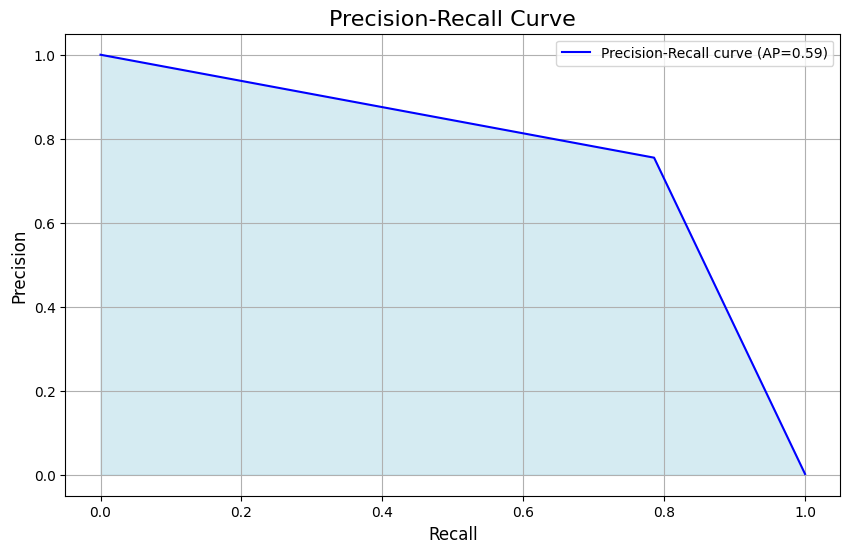

In [79]:
plot_precision_recall(y_test, y_pred)

XGBoost  has an AUC score of  0.8926373201221963


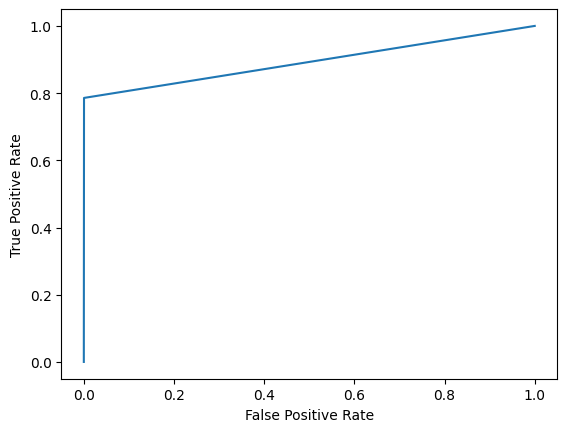

In [80]:
plot_roc_curve(y_test, y_pred, "XGBoost")

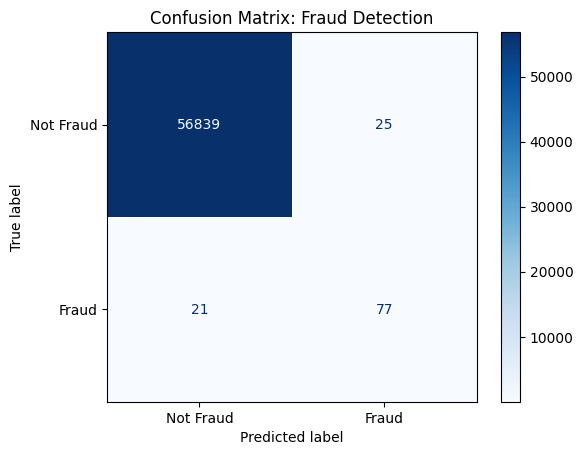

In [81]:
plot_confusion_matrix(y_test, y_pred)

Rendiment raonable. Tot i aixì, nombre elevat de FP i FN. Rendiment semblant al Random Forest però pitjor.

In [82]:
classification_metrics(y_test, y_pred, "XGBOOST", experiment_name, all_results)

,Model,Data Type,Class,Precision,Recall,F1-Score,Macro F1,Weighted F1
0,XGBOOST,Undersampling,0,1.000,1.000,1.00,0.885,0.999
1,XGBOOST,Undersampling,1,0.755,0.786,0.77,0.885,0.999


Equilibri entre Precisió i Recall, com ja s'ha dit, rendiment raonable.

#### Neural networks

In [24]:
model = Sequential([
    InputLayer(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [25]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy', AUC(name='auc'), tf.keras.metrics.Recall(name='recall')])

In [26]:
early_stopping = EarlyStopping(
    monitor='val_recall',
    mode='max',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

In [27]:
history = model.fit(X_train_undersampled, y_train_undersampled,
                    callbacks=[early_stopping],
                    epochs=30, batch_size=16, validation_split=0.2)

Epoch 1/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.8137 - auc: 0.8503 - loss: 0.4029 - recall: 0.7294 - val_accuracy: 0.8208 - val_auc: 0.0000e+00 - val_loss: 0.5998 - val_recall: 0.8208
Epoch 2/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9803 - auc: 0.9814 - loss: 0.0704 - recall: 0.8488 - val_accuracy: 0.8566 - val_auc: 0.0000e+00 - val_loss: 0.4568 - val_recall: 0.8566
Epoch 3/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9883 - auc: 0.9801 - loss: 0.0414 - recall: 0.8459 - val_accuracy: 0.8530 - val_auc: 0.0000e+00 - val_loss: 0.4778 - val_recall: 0.8530
Epoch 4/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9846 - auc: 0.9955 - loss: 0.0460 - recall: 0.8785 - val_accuracy: 0.8566 - val_auc: 0.0000e+00 - val_loss: 0.6505 - val_recall: 0.8566
Epoch 5/30
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9943 - auc: 0.9994 - loss: 0.0209 - recall: 0.9484 - val_accuracy: 0.8710 - val_auc: 0.0000e+00 - val_loss: 0.5480 - val_recall: 0.87

In [43]:
y_pred = model.predict(X_test).flatten()

y_pred = (y_pred > 0.9).astype(int)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


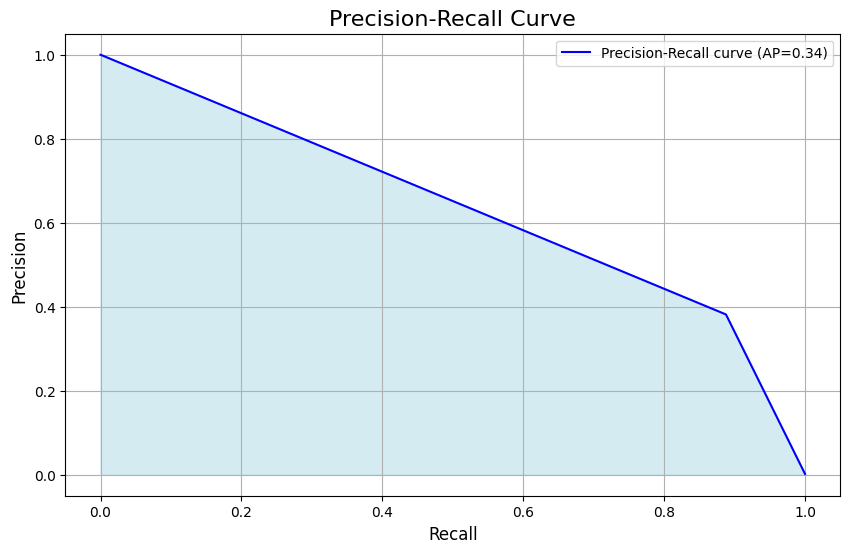

In [45]:
plot_precision_recall(y_test, y_pred)

Neural Network  has an AUC score of  0.9426377507953098


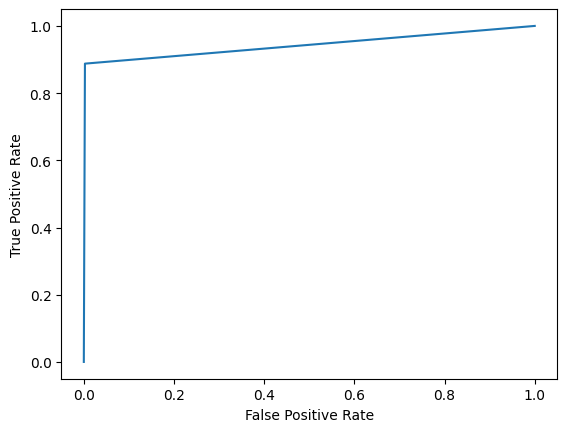

In [46]:
plot_roc_curve(y_test, y_pred, "Neural Network")

In [47]:
classification_metrics(y_test, y_pred, "Neural Network", experiment_name, all_results)

,Model,Data Type,Class,Precision,Recall,F1-Score,Macro F1,Weighted F1
0,Neural Network,Undersampling,0,1.000,0.998,0.999,0.766,0.998
1,Neural Network,Undersampling,1,0.382,0.888,0.534,0.766,0.998


Precisió molt baixa que infla la Recall com ja s'ha vist en altres models.

En conclusió, reduir la mida del conjunt de dades, encara que s'equiparin les classes, és negatiu. Alguns motius:

- Eliminació de moltes dades de la classe majoritària i per tant, pèrdua de patrons i molta informació. Recordem que la reducció de dades es fa de manera aleatòria.
- Hem fet reducció a la classe amb més instàncies i al predir ho hem fet contra el conjunt no reduit. Els models no han pogut generalitzar correctament.
- Overfitting davant de tants pocs exemples.

El següent experiment es fa el pas contrari, equiparar la classe minoritària a la majoritària.

### 4.2 SMOTE

In [48]:
from imblearn.over_sampling import SMOTE

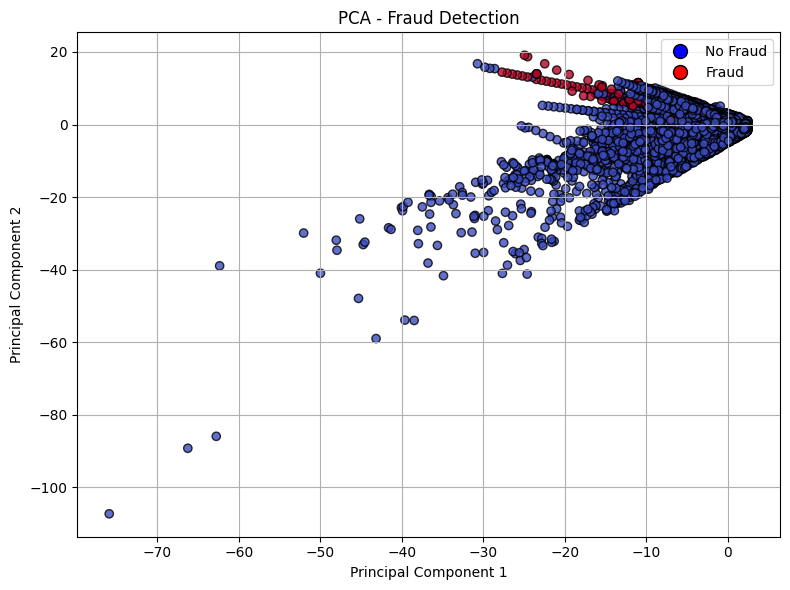

In [49]:
plot_class_distribution(X, y)

In [50]:
smote = SMOTE(random_state=random_seed, k_neighbors=5, sampling_strategy='minority')
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [51]:
print(X_train_resampled.shape)

(454902, 30)


In [62]:
experiment_name = "SMOTE"

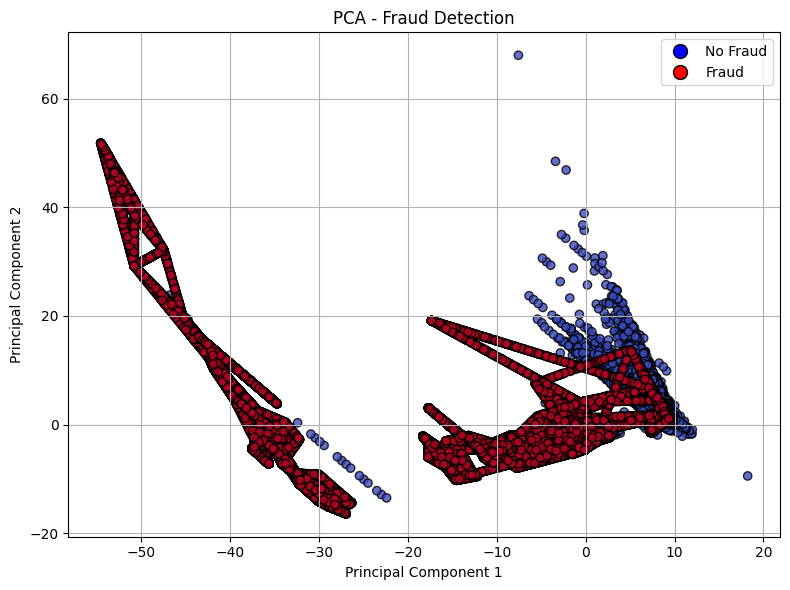

In [52]:
plot_class_distribution(X_train_resampled, y_train_resampled)

#### Logistic Regression with SMOTE Oversampling

In [53]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 20],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'class_weight': [None, 'balanced'],
    'max_iter': [200]
}

model = grid_search_best_model(LogisticRegression(), param_grid, X_train_resampled, y_train_resampled)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'C': 10, 'class_weight': 'balanced', 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}
Best ROC-AUC Score: 0.9524381077548535


In [69]:
y_probs = model.predict_proba(X_test)[:, 1]
threshold = 0.99
y_pred = (y_probs > threshold).astype(int)

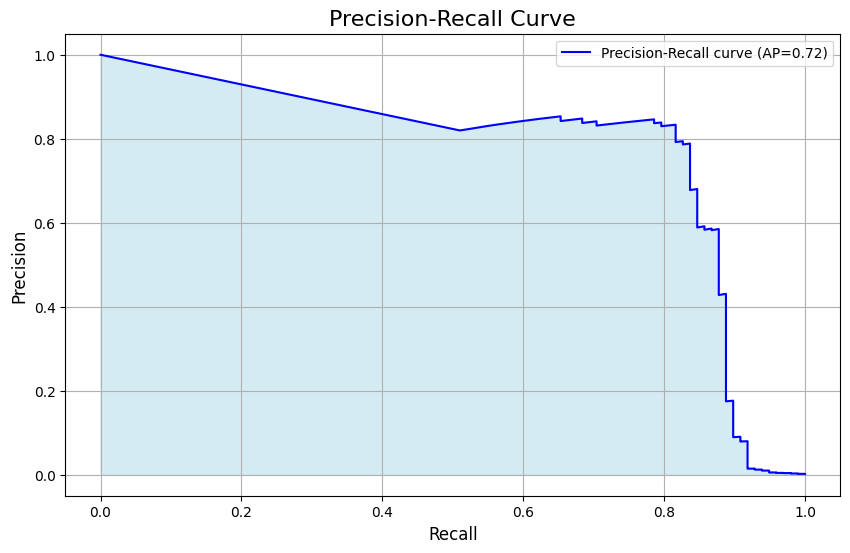

In [70]:
plot_precision_recall(y_test, y_probs)

model  has an AUC score of  0.9381600065462313


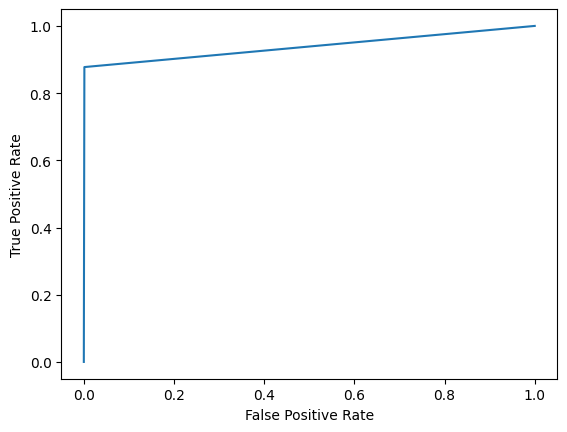

In [71]:
plot_roc_curve(y_test, y_pred)

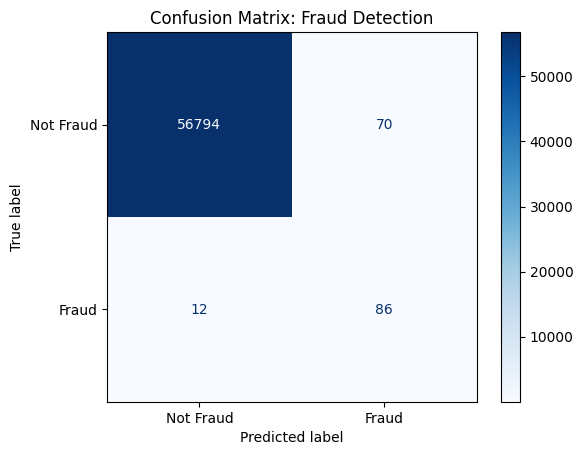

In [72]:
plot_confusion_matrix(y_test, y_pred)

In [73]:
classification_metrics(y_test, y_pred, "Logistic Regression", experiment_name, all_results)

,Model,Data Type,Class,Precision,Recall,F1-Score,Macro F1,Weighted F1
0,Logistic Regression,SMOTE,0,1.000,0.999,0.999,0.838,0.999
1,Logistic Regression,SMOTE,1,0.551,0.878,0.677,0.838,0.999


#### Random Forest with SMOTE Oversampling

In [74]:
clf = RandomForestClassifier(n_estimators=100, random_state=random_seed)
clf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [102]:
y_pred = clf.predict(X_test)

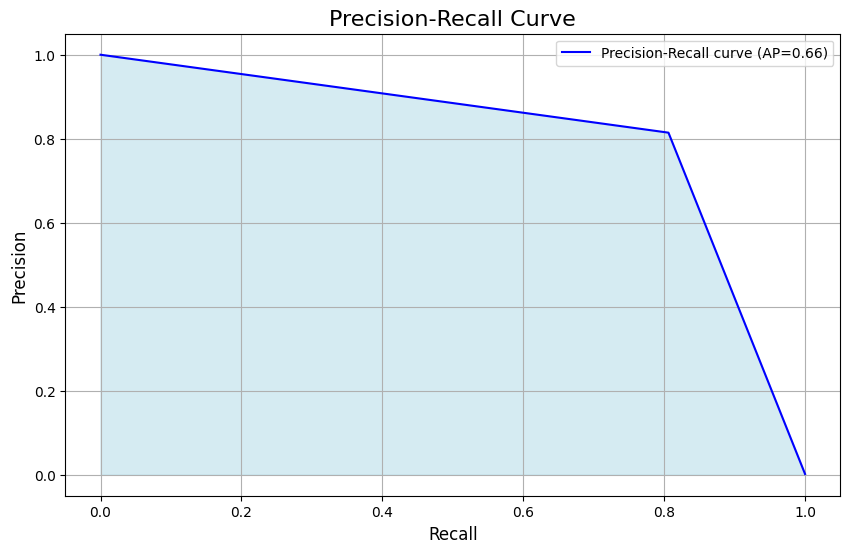

In [103]:
plot_precision_recall(y_test, y_pred)

random forest  has an AUC score of  0.9029029521206345


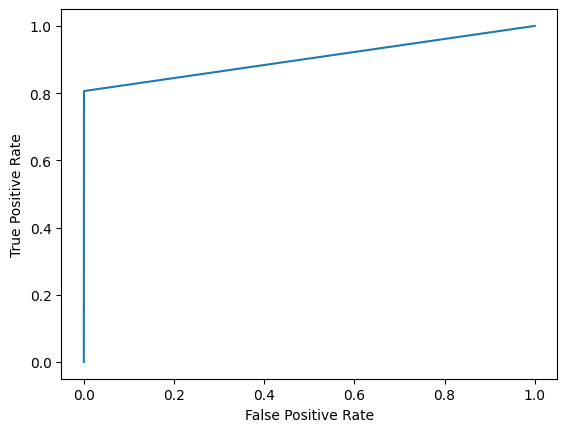

In [104]:
plot_roc_curve(y_test, y_pred, "random forest")

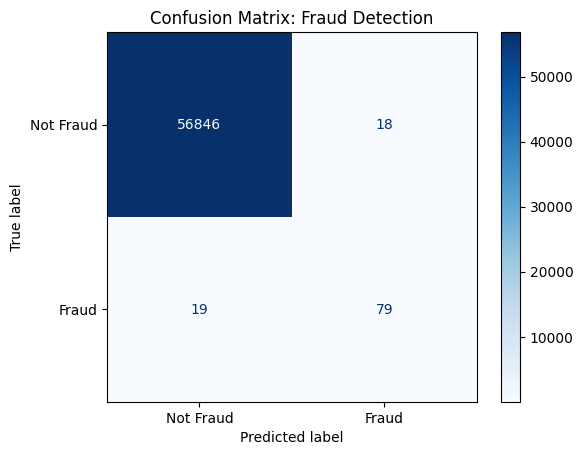

In [105]:
plot_confusion_matrix(y_test, y_pred)

In [106]:
classification_metrics(y_test, y_pred, "Random Forest", experiment_name, all_results)

,Model,Data Type,Class,Precision,Recall,F1-Score,Macro F1,Weighted F1
0,Random Forest,SMOTE,0,1.000,1.000,1.00,0.905,0.999
1,Random Forest,SMOTE,1,0.814,0.806,0.81,0.905,0.999


#### LGMB

In [107]:
param_grid = {
    'n_estimators': [100, 200, 300, 1000],
    'num_leaves': [300, 600, 900],
    'learning_rate': [0.001, 0.01, 0.1]
}

#Having the best features, grid search is disabled
#model = grid_search_best_model(lgb.LGBMClassifier(random_state=random_seed), param_grid, X_train_resampled, y_train_resampled)


model = lgb.LGBMClassifier(random_state=random_seed,
                           n_estimators=1000, num_leaves=300,
                           max_depth=-1, learning_rate=0.1,
                           verbose=-1)
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)

model = lgb.LGBMClassifier(random_state=random_seed, n_estimators=1000, num_leaves=300, max_depth=-1, learning_rate=0.1)

0.875	0.857

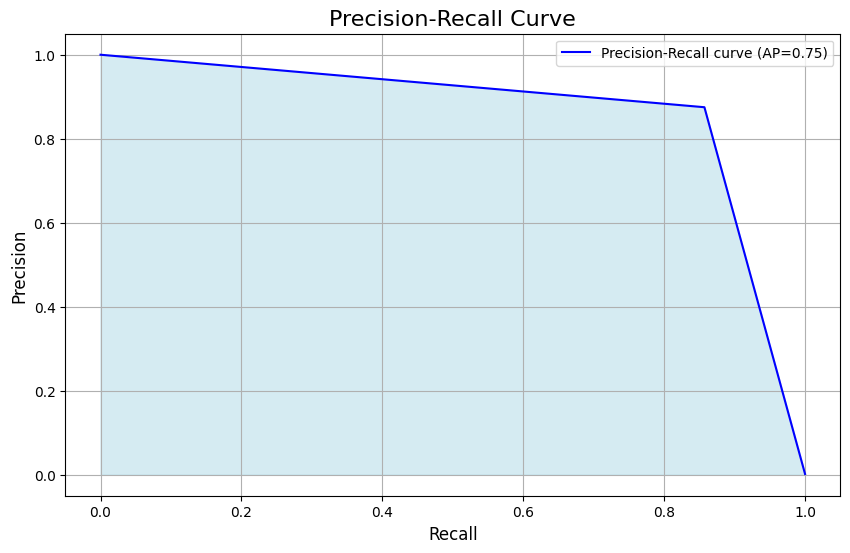

In [113]:
plot_precision_recall(y_test, y_pred)

XGBoost  has an AUC score of  0.9284659136586543


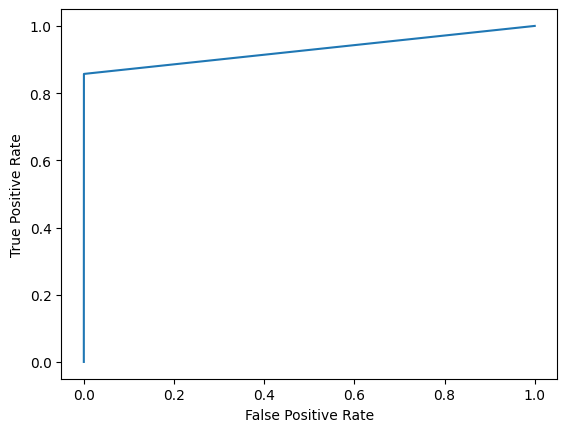

In [108]:
plot_roc_curve(y_test, y_pred, "XGBoost")

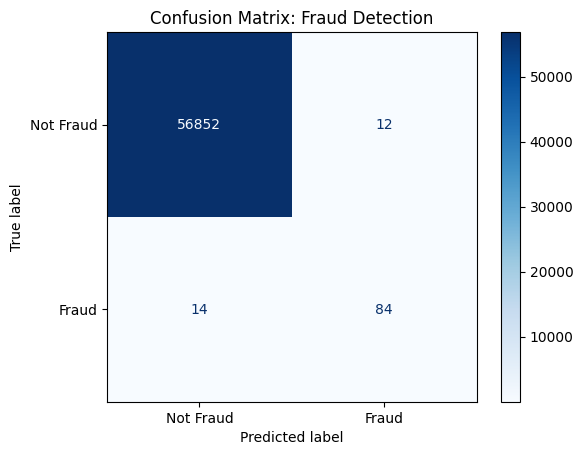

In [109]:
plot_confusion_matrix(y_test, y_pred)

In [111]:
classification_metrics(y_test, y_pred, "LGBM", experiment_name, all_results)

,Model,Data Type,Class,Precision,Recall,F1-Score,Macro F1,Weighted F1
0,LGBM,SMOTE,0,1.000,1.000,1.000,0.933,1.0
1,LGBM,SMOTE,1,0.875,0.857,0.866,0.933,1.0


#### XGBoost

In [112]:
param_grid = {
    'n_estimators': [100, 500, 1000, 1500],
    'eta': [0.05, 0.1, 0.2]
}

model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    n_estimators = 1500,
    eta=0.05,
    max_depth = 10,
    random_state=random_seed
)

model.fit(X_train_resampled, y_train_resampled)

#model = grid_search_best_model(model, param_grid, X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.05, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1500,
              n_jobs=None, num_parallel_tree=None, ...)

Best Parameters: {'eta': 0.05, 'max_depth': 10, 'n_estimators': 600}


0.825	0.867

XGBoost  has an AUC score of  0.9335151970185936


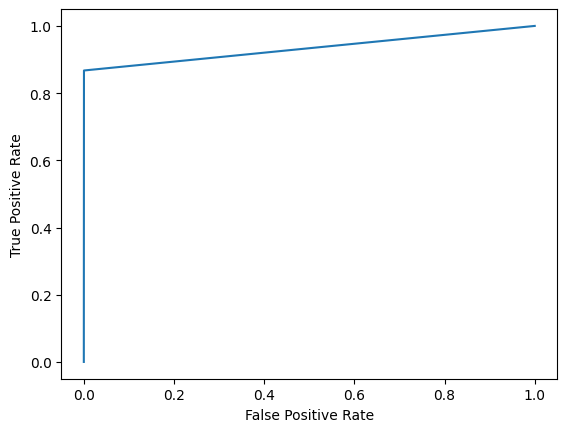

In [114]:
y_pred = model.predict(X_test)


plot_roc_curve(y_test, y_pred, "XGBoost")

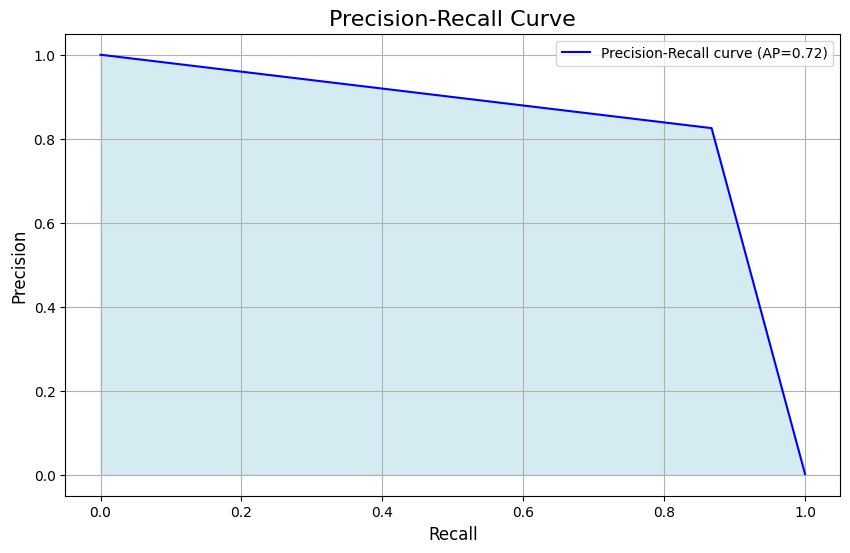

In [115]:
plot_precision_recall(y_test, y_pred)

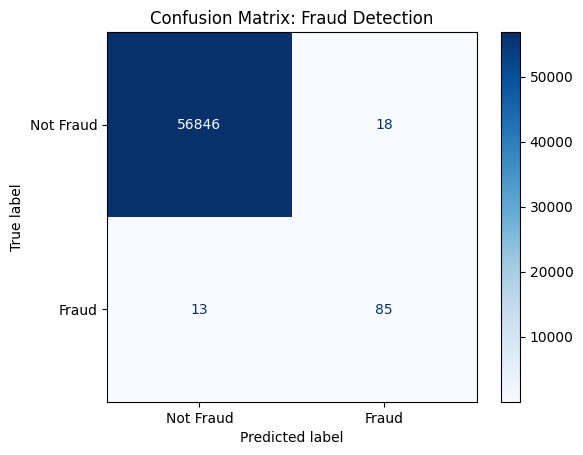

In [116]:
plot_confusion_matrix(y_test, y_pred)

In [118]:
classification_metrics(y_test, y_pred, "XGBoost", experiment_name, all_results)

,Model,Data Type,Class,Precision,Recall,F1-Score,Macro F1,Weighted F1
0,XGBoost,SMOTE,0,1.000,1.000,1.000,0.923,0.999
1,XGBoost,SMOTE,1,0.825,0.867,0.846,0.923,0.999


#### Neural Network

In [119]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_resampled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [120]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',  # For multi-class classification
              metrics=['accuracy', AUC(name='auc'), tf.keras.metrics.Recall(name='recall')])

In [121]:
early_stopping = EarlyStopping(
    monitor='val_recall',
    mode='max',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

In [122]:
history = model.fit(X_train_resampled, y_train_resampled,
                    callbacks=[early_stopping],
                    epochs=30, batch_size=16, validation_split=0.2)

Epoch 1/30
22746/22746 ━━━━━━━━━━━━━━━━━━━━ 86s 4ms/step - accuracy: 0.9893 - auc: 0.9975 - loss: 0.0335 - recall: 0.9824 - val_accuracy: 1.0000 - val_auc: 0.0000e+00 - val_loss: 0.0038 - val_recall: 1.0000
Epoch 2/30
22746/22746 ━━━━━━━━━━━━━━━━━━━━ 83s 4ms/step - accuracy: 0.9985 - auc: 0.9997 - loss: 0.0062 - recall: 0.9988 - val_accuracy: 0.9996 - val_auc: 0.0000e+00 - val_loss: 0.0015 - val_recall: 0.9996
Epoch 3/30
22746/22746 ━━━━━━━━━━━━━━━━━━━━ 85s 4ms/step - accuracy: 0.9990 - auc: 0.9998 - loss: 0.0048 - recall: 0.9991 - val_accuracy: 1.0000 - val_auc: 0.0000e+00 - val_loss: 3.1297e-04 - val_recall: 1.0000
Epoch 4/30
22746/22746 ━━━━━━━━━━━━━━━━━━━━ 137s 4ms/step - accuracy: 0.9992 - auc: 0.9998 - loss: 0.0037 - recall: 0.9993 - val_accuracy: 0.9999 - val_auc: 0.0000e+00 - val_loss: 3.8327e-04 - val_recall: 0.9999
Epoch 5/30
22746/22746 ━━━━━━━━━━━━━━━━━━━━ 84s 4ms/step - accuracy: 0.9993 - auc: 0.9999 - loss: 0.0032 - recall: 0.9994 - val_accuracy: 1.0000 - val_auc: 0.0000e

In [123]:
y_pred = model.predict(X_test).flatten()

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [129]:
y_pred = (y_pred > 0.6).astype(int)

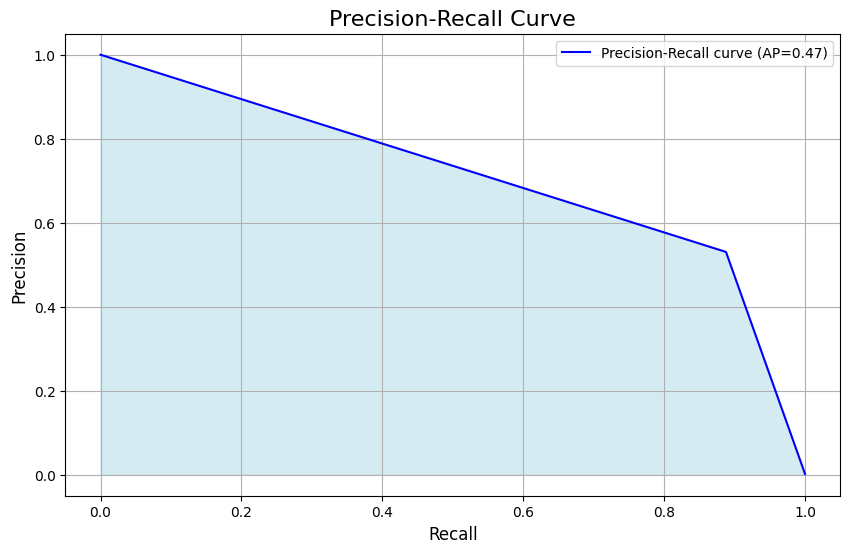

In [133]:
plot_precision_recall(y_test, y_pred)

Neural Network  has an AUC score of  0.9432004969967728


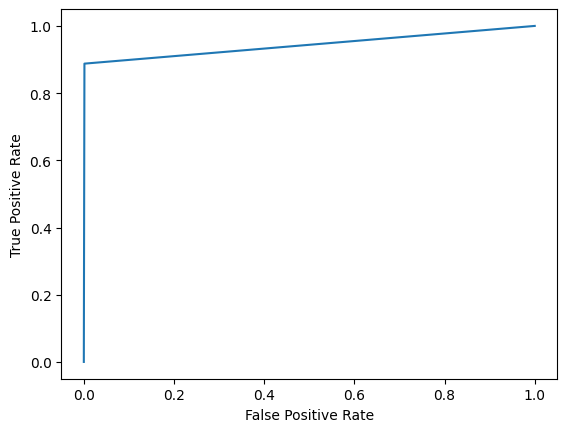

In [130]:
plot_roc_curve(y_test, y_pred, "Neural Network")

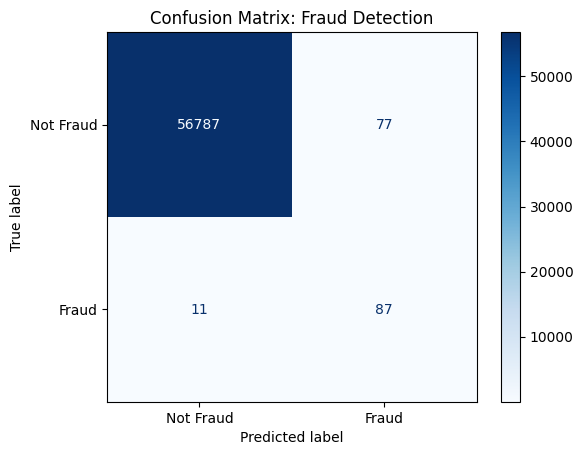

In [131]:
plot_confusion_matrix(y_test, y_pred)

In [132]:
classification_metrics(y_test, y_pred, "Neural Network", experiment_name, all_results)

,Model,Data Type,Class,Precision,Recall,F1-Score,Macro F1,Weighted F1
0,Neural Network,SMOTE,0,1.00,0.999,0.999,0.832,0.999
1,Neural Network,SMOTE,1,0.53,0.888,0.664,0.832,0.999


## 5.Model amb les millors característiques

In [135]:
all_results_df = pd.concat(all_results, ignore_index=True)
all_results_df

,Model,Data Type,Class,Precision,Recall,F1-Score,Macro F1,Weighted F1
0,Neural Network,Undersampling,0,1.000,0.994,0.997,0.672,0.996
1,Neural Network,Undersampling,1,0.215,0.888,0.346,0.672,0.996
2,Neural Network,Undersampling,0,1.000,0.998,0.999,0.766,0.998
3,Neural Network,Undersampling,1,0.382,0.888,0.534,0.766,0.998
4,Neural Network,Undersampling,0,1.000,0.983,0.991,0.573,0.990
5,Neural Network,Undersampling,1,0.084,0.908,0.154,0.573,0.990
6,Neural Network,Undersampling,0,1.000,0.998,0.999,0.766,0.998
7,Neural Network,Undersampling,1,0.382,0.888,0.534,0.766,0.998
8,Logistic Regression,SMOTE,0,1.000,0.994,0.997,0.658,0.996
9,Logistic Regression,SMOTE,1,0.195,0.888,0.320,0.658,0.996
